In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load the input image
image = cv2.imread('../images/three.jpg')
original_image = image.copy()

In [3]:
print(original_image.shape)
for i in range(2):
    original_image = cv2.pyrDown(original_image)
print(original_image.shape)

(4160, 3120, 3)
(1040, 780, 3)


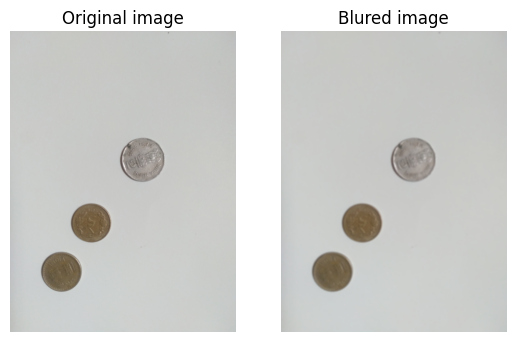

In [4]:
# Smoothing: Apply Gaussian blur to reduce noise
smoothed_image = cv2.GaussianBlur(original_image, (7,7), 3)
plt.subplot(121),plt.axis('off'), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original image')
plt.subplot(122),plt.axis('off'), plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB)), plt.title('Blured image')
plt.show()

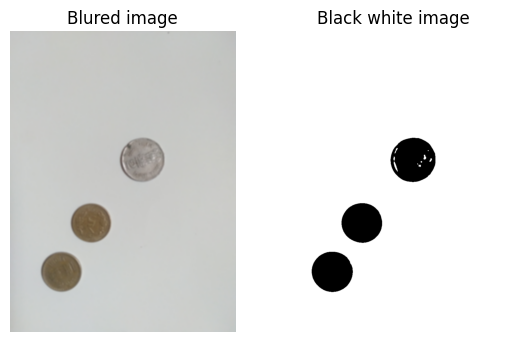

In [5]:
# Thresholding: Apply binary thresholding to the smoothed image
gray_image = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2GRAY)
_, thresholded_image = cv2.threshold(gray_image, 170, 255, cv2.THRESH_BINARY)
plt.subplot(121),plt.axis('off'), plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB)), plt.title('Blured image')
plt.subplot(122),plt.axis('off'), plt.imshow(cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB)), plt.title('Black white image')
plt.show()

In [6]:
# Gradient Calculation: Apply Sobel gradient in x and y directions
gradient_x = cv2.Sobel(thresholded_image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(thresholded_image, cv2.CV_64F, 0, 1, ksize=3)


In [7]:
# Combine gradient images to get magnitude representation
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)


In [8]:
# Find contours in the gradient magnitude image
contours, _ = cv2.findContours(gradient_magnitude.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

3


In [9]:
# Filter out small contours (noise) and count the coins
min_coin_area = 1000  # Minimum contour area to be considered as a coin
coin_count = 0

for contour in contours:
    if cv2.contourArea(contour) > min_coin_area:
        # Draw the contour on the original image
        cv2.drawContours(original_image, [contour], -1, (0, 255, 0), 2)
        coin_count += 1

Number of coins detected: 3


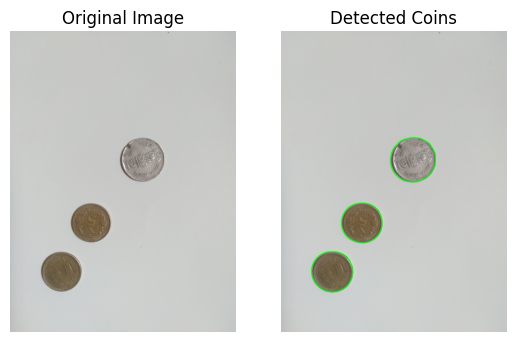

In [11]:
print(f'Number of coins detected: {coin_count}')
plt.subplot(121),plt.axis('off'), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122),plt.axis('off'), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Detected Coins')
plt.show()